In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../input/train-housing/train (2).csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# lets check the different neighborhoods
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [6]:
# total number of houses in the neighborhood
all_houses = df.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

Total Number of Houses in the Neighborhood : 1460


In [7]:
# total number of houses in the Old town neighborhood
houses_in_OldTown = df[df['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)

Total Number of Houses in the Old Town Road : 113


In [8]:
# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability )+'%')

Probability of picking a house in OldTown: 7.74%


In [9]:
## Enter condtional probability code
cond_prob = (houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1)) 
print("The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is {0:.9f}".
      format(cond_prob*100))

The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is 0.594139352


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


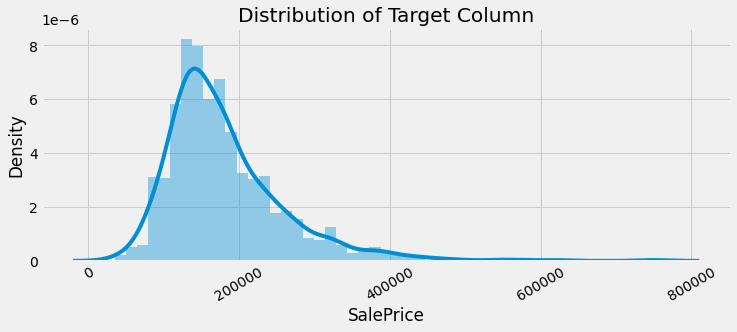

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(df['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

In [11]:
import numpy as np
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a= df['SalePrice'], size=500)

# getting the sample mean
print ("Sample mean:", sample_ages.mean() )          

# getting the population mean
print("Population mean:", df['SalePrice'].mean())

Sample mean: 177499.802
Population mean: 180921.19589041095


In [12]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= df['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = df['SalePrice'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(df['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


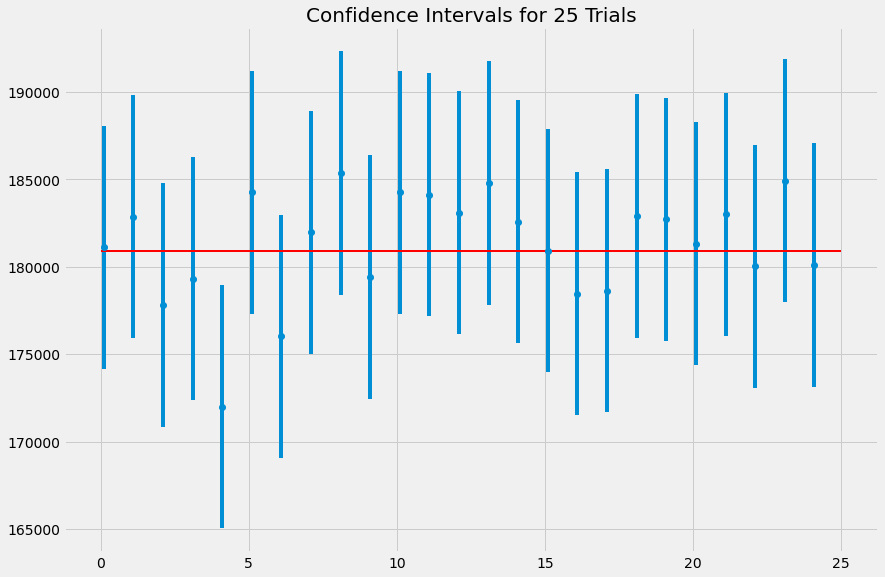

In [13]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= df['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value* 
    z_critical = stats.norm.ppf(q = 0.975)         

    # Get the population standard deviation
    pop_stdev = df['SalePrice'].std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=df['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 20)
plt.show()




In [14]:
# lets import z test from statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = df[df['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = df['SalePrice'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572


If the P value if less than 0.05, then we can reject our null hypothesis against the alternate hypothesis.

The Probability of getting the given distribution of houseprices in OldTown under the assumption that its mean, is the same as the mean of all house prices.